In [1]:
import pandas as pd 
df = pd.read_csv('data/ner_dataset.csv',encoding='latin1')#i will not work if we use utf-8
print(df)

          Sentence #           Word  POS Tag
0        Sentence: 1      Thousands  NNS   O
1                NaN             of   IN   O
2                NaN  demonstrators  NNS   O
3                NaN           have  VBP   O
4                NaN        marched  VBN   O
...              ...            ...  ...  ..
1048570          NaN           they  PRP   O
1048571          NaN      responded  VBD   O
1048572          NaN             to   TO   O
1048573          NaN            the   DT   O
1048574          NaN         attack   NN   O

[1048575 rows x 4 columns]


In [2]:
df.describe() 

,Sentence #,Word,POS,Tag
count,47959,1048565,1048575,1048575
unique,47959,35177,42,17
top,Sentence: 47959,the,NN,O
freq,1,52573,145807,887908


In [3]:
df.shape

(1048575, 4)

In [4]:
df.dtypes

Sentence #    object
Word          object
POS           object
Tag           object
dtype: object

In [5]:
# check how many rows have NaNs
df.isnull().sum()

Sentence #    1000616
Word               10
POS                 0
Tag                 0
dtype: int64

In [6]:
df = df.fillna(method='ffill')# filling NaN
df.tail(28)

C:\Users\HP\AppData\Local\Temp\ipykernel_15096\578350626.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')# filling NaN


,Sentence #,Word,POS,Tag
1048547,Sentence: 47957,landed,VBD,O
1048548,Sentence: 47957,in,IN,O
1048549,Sentence: 47957,fields,NNS,O
1048550,Sentence: 47957,belonging,VBG,O
1048551,Sentence: 47957,to,TO,O
1048552,Sentence: 47957,a,DT,O
1048553,Sentence: 47957,nearby,JJ,O
1048554,Sentence: 47957,village,NN,O
1048555,Sentence: 47957,.,.,O
1048556,Sentence: 47958,They,PRP,O


In [7]:
# check how many rows have NaNs
df.isnull().sum()

Sentence #    0
Word          0
POS           0
Tag           0
dtype: int64

In [8]:
words = list(set(df['Word'].values))
num_words = len(words)

In [9]:
tags = list(set(df['Tag'].values))#iob2 tags 
num_tags = len(tags)

In [10]:
num_words, num_tags

(35177, 17)

In [11]:
class SentenceGetter(object):
    def __init__(self, df):
        self.n_sent = 1        
        self.df = df
        # Syntax of --> lambda arguments : expression
        # zip () generates tuples
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s['Word'].values.tolist(),
                                                          s['POS'].values.tolist(),
                                                          s['Tag'].values.tolist())]
        self.grouped = self.df.groupby('Sentence #').apply(agg_func)
        self.sentences = [s for s in self.grouped]

In [12]:
getter = SentenceGetter(df)
sentences = getter.sentences

C:\Users\HP\AppData\Local\Temp\ipykernel_15096\2024132460.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  self.grouped = self.df.groupby('Sentence #').apply(agg_func)


In [13]:
sentences[0] # every list is an one sentence

[('Thousands', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('demonstrators', 'NNS', 'O'),
 ('have', 'VBP', 'O'),
 ('marched', 'VBN', 'O'),
 ('through', 'IN', 'O'),
 ('London', 'NNP', 'B-geo'),
 ('to', 'TO', 'O'),
 ('protest', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('war', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('Iraq', 'NNP', 'B-geo'),
 ('and', 'CC', 'O'),
 ('demand', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('withdrawal', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('British', 'JJ', 'B-gpe'),
 ('troops', 'NNS', 'O'),
 ('from', 'IN', 'O'),
 ('that', 'DT', 'O'),
 ('country', 'NN', 'O'),
 ('.', '.', 'O')]

In [14]:
word2idx = {w: i for i, w in enumerate(words)}
#print (word2idx)
tag2idx = {t: i for i, t in enumerate(tags)}
#print(tag2idx)

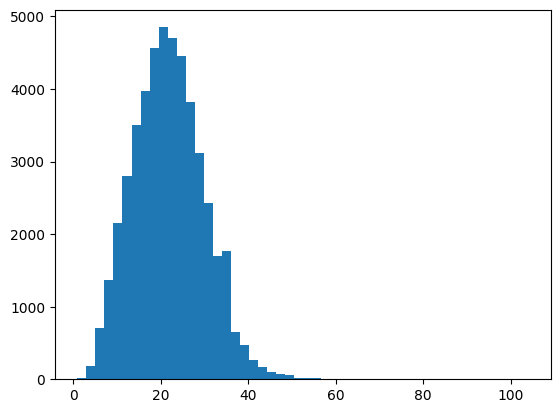

In [15]:
import matplotlib.pyplot as plt
plt.hist([len(s) for s in sentences], bins=50)
plt.show()

In [16]:
import tensorflow as tf
#https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences#add numbers to the sequences to make them all be the same length. 
from tensorflow.keras.utils import to_categorical

max_len = 50

X = [[word2idx[w[0]] for w in s] for s in sentences]


X = pad_sequences(maxlen = max_len, sequences = X, padding='post', value=num_words-1)#35177

y = [[tag2idx[w[2]] for w in s] for s in sentences]


y = pad_sequences(maxlen = max_len, sequences = y, padding = 'post', value = tag2idx['O'])#5

#https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l09c02_nlp_padding.ipynb#scrollTo=tcFghvQ34cZK
y = [to_categorical(i, num_classes=num_tags) for i in y]#Converts a class vector (integers) to binary class matrix.


In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [18]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional

In [19]:
input_word = Input(shape=(max_len, ))
model = Embedding(input_dim = num_words, output_dim = max_len, input_length = max_len)(input_word)
model = SpatialDropout1D(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
out = TimeDistributed(Dense(num_tags, activation='softmax'))(model)
model = Model(input_word, out)
model.summary()

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 50, 50)         │     1,758,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 50, 50)         │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 50, 200)        │       120,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 50, 17)         │         3,417 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,883,067 (7.18 MB)

 Trainable params: 1,883,067 (7.18 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
from tensorflow.keras.callbacks import  EarlyStopping
#from livelossplot.tf_keras import PlotLossesCallback

In [22]:
#PlotLossesCallback(),
import numpy as np
early_stopping = EarlyStopping(monitor='val_accuracy', patience=1, verbose=0, mode='max', restore_best_weights=False)
callbacks = [early_stopping]

history = model.fit(
    x_train, np.array(y_train),
    validation_split=0.2,
    batch_size = 32,
    epochs = 3,
    verbose = 1,
    callbacks = callbacks
)

Epoch 1/3
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 111s 94ms/step - accuracy: 0.9413 - loss: 0.3080 - val_accuracy: 0.9821 - val_loss: 0.0612
Epoch 2/3
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 63s 59ms/step - accuracy: 0.9846 - loss: 0.0521 - val_accuracy: 0.9851 - val_loss: 0.0493
Epoch 3/3
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 62s 58ms/step - accuracy: 0.9887 - loss: 0.0371 - val_accuracy: 0.9859 - val_loss: 0.0459


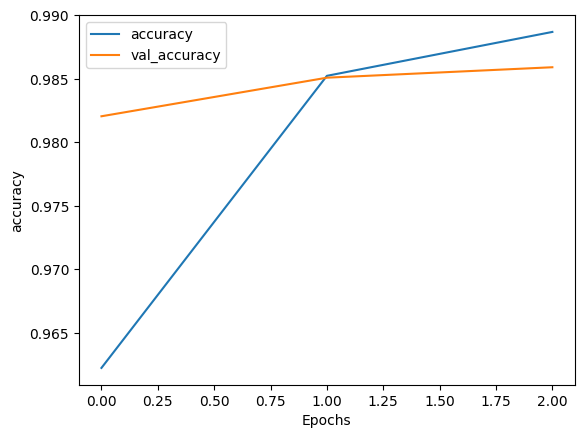

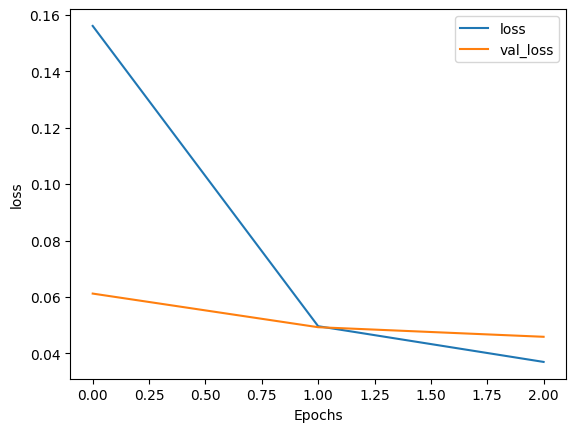

In [23]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss");

In [24]:
model.evaluate(x_test, np.array(y_test))

150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9851 - loss: 0.0488


[0.04722507670521736, 0.9855921268463135]